<a href="https://colab.research.google.com/github/OnyedikachiOnwuachuke/LargeLanguageModel-LLM-/blob/main/LargeLanguageModel(Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RoBERTa-Based Large Language Model (LLM) Sentiment Analysis on Amazon Polarity
Name: Onyedikachi Onwuachuke

Studnet ID: 22021169

Colab Link: https://colab.research.google.com/drive/1w6foepiFNSdP7ds9IMY1a8ADNgeh6yHV?usp=sharing

Github Link: https://github.com/OnyedikachiOnwuachuke/LargeLanguageModel-LLM-

##Introduction
Natural language processing (NLP) has been transformed by large language models (LLMs) such as BERT (Bidirectional Encoder Representations from Transformers), which allow for deep bidirectional text interpretation. BERT examines complete sequences at once, which helps it better understand context than typical models that read text sequentially. BERT is now considered a state-of-the-art model for a variety of natural language processing (NLP) applications, such as named entity recognition, sentiment analysis, and question answering. Sentiment analysis entails assigning a text's sentiment a positive, negative, or neutral classification. Numerous applications, including comprehending client input, keeping an eye on social media, and enhancing user experiences, depend on this work. Sentiment analysis, a subfield of Natural Language Processing (NLP), is pivotal for understanding public opinion by analyzing textual data. Sentiment analysis has been a long established area of research in natural language process-ing (NLP), which aims to systematically study people’s opinions, sentiments, emotions, etc, through computational methods Liu et al.(2023).The Amazon Polarity dataset provides a binary classification task where reviews are categorized as either positive or negative, making it an ideal dataset for sentiment analysis using transformer-based models like RoBERTa.

The goal of this project is to create a sentiment analysis model with DistilRoBERTa, a pared-down version of RoBERTa that has been optimized on a portion of the Amazon Polarity dataset. Sentiment analysis is essential for automating textual data interpretation and comprehending public sentiment. To create a strong sentiment classifier, the process included data investigation, model training, fine-tuning, and evaluation.

##Literature Review
A key task in Natural Language Processing (NLP), sentiment analysis has evolved significantly over the past decade, with the introduction of transformer-based models and deep learning, which have resulted in significant performance gains. This section provides a review of relevant literature that explores the comprehensive capabilities of LLMs in performing various sentiment analysis tasks, from conventional sentiment classification to aspect-based sentiment analysis and multifaceted analysis of subjective texts.

The development of BERT (Bidirectional Encoder Representations from Transformers) by Devlin et al. (2018) is one of the most important advances in NLP. BERT achieved state-of-the-art performance in sentiment analysis and other NLP tasks due to its ability to collect context in both directions of a sentence. BERT is a highly prominent model in the field because of its architecture, which is built on the transformer. Previous models could only interpret context in one direction.

Liu et al. (2019) presented RoBERTa (Robustly Optimized BERT Pretraining Approach), which builds on the BERT foundation. By optimizing the pretraining phase, which includes longer training with bigger batch sizes and more data as well as dynamic masking, RoBERTa outperforms BERT. With these improvements, RoBERTa was even more successful on several NLP benchmarks, proving its resilience and potency—especially on jobs requiring the knowledge of complex context, including sentiment categorization.

Zhang et al. (2020) investigated the use of transformer models for large-scale sentiment analysis in a more recent work, with a focus on e-commerce sites like Amazon. Their research demonstrated how well domain-specific datasets can be used to fine-tune pre-trained models like BERT and RoBERTa. They showed that RoBERTa may perform better in terms of accuracy and robustness than other neural models and conventional approaches when it was fine-tuned on a dataset like the Amazon Polarity dataset, especially when handling large-scale and noisy data.

Together, this research highlights the tremendous progress transformer models have achieved in sentiment analysis. The analysis of textual data has undergone a paradigm shift because of the move from conventional models to deep learning and, more recently, transformer-based architectures. Because of its optimization over BERT, RoBERTa stands out as a highly effective model for sentiment analysis tasks, as demonstrated by its higher performance in numerous tests. Using these insights, my current work improves RoBERTa on the Amazon Polarity dataset with the goal of duplicating and expanding on the achievements reported in these earlier works.






**Importing The Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
from wordcloud import WordCloud
!pip install datasets
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report



##Overview of the Dataset
Hugging Face's "Amazon Polarity 10% Dataset" was the dataset used for this research. This dataset, which makes up around 10% of the original data, is a condensed and carefully selected version of the complete Amazon Polarity dataset. It is made up of consumer reviews that have been labeled as either good or negative. Model training and evaluation were made easier by using the training and test splits that were included in the dataset.







**Loading The Dataset**

In [2]:
# Load the dataset
ds = load_dataset("ben-epstein/amazon_polarity_10_pct")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/360000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/40000 [00:00<?, ? examples/s]

##Methodology

###Exploratory Data Analysis (EDA)
To make manipulation easier, the dataset was first loaded and then converted into a Pandas DataFrame. The necessary informations about the datset was displayed. To comprehend the distribution of sentiment labels and the content length of reviews, the dataset was divided into training and test sets. A quick exploratory data analysis was then carried out.

Label Mapping: To improve interpretability, the emotion labels—which were initially encoded as 0 (Negative) and 1 (Positive)—were mapped to textual labels.
Spread of Emotional Labels: To see how the distribution of good and negative evaluations was distributed, a count plot was created. It was discovered that the dataset was balanced, with both labels distributed equally.

Content Length Analysis: To examine how the reviews' content lengths were distributed, a histogram was created. The maximum sequence length for tokenization was determined with the aid of this analysis.

###Data Preparation

**Data Spliting:**
The dataset was then divided into training and validation sets, with 20% of the training data put aside for validation in order to verify the model's performance throughout training. Both sets preserved the original sentiment label distribution thanks to this stratified separation.

**Tokenization:**
The AutoTokenizer from the Hugging Face library—more precisely, the tokenizer that corresponds to the DistilRoBERTa model—was used to tokenize the reviews. Truncation and padding were used during the tokenization process to provide consistent input lengths, which is required for batch processing in transformers.

**Creating a Custom Dataset Class and Preparing the DataLoader:**
 PyTorch's torch.utils.data.Dataset was used to create a custom dataset class called SentimentDataset, which facilitated the model's training and evaluation. This class was created to effectively manage the tokenized data and associated labels.For the training and validation datasets, separate instances of the customized SentimentDataset class were created. In order to prepare the tokenized data for the model's input during training and evaluation, this step was crucial.




In [3]:
# Check the available splits in the dataset
print("Available splits:", ds.keys())

# Converting the dataset to a Pandas DataFrame for easier display and exploration
df_train = pd.DataFrame(ds['train'])
df_test = pd.DataFrame(ds['test'])
df_train.head()

Available splits: dict_keys(['train', 'test'])


,label,title,content
0,0,Ariel Litte Mermaid with pearl kit,Arrived very quickly and it is a cute topper h...
1,1,Puritanical ostracism,"""Easy A"" explains it best. If you can't relate..."
2,0,"Bulky, feels gross, not worth ordering",I read up on belly-wrapping after my c-section...
3,0,An Ever expanding story followed by same ol sa...,Very disappointing read. Starts with her tale ...
4,0,Self-Serving Message,"This is the tale of a kindly Rabbi, his sweet ..."


In [4]:
# The necessary information about the train dataset
df_train.info()
df_train.describe()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    360000 non-null  int64 
 1   title    360000 non-null  object
 2   content  360000 non-null  object
dtypes: int64(1), object(2)
memory usage: 8.2+ MB


(360000, 3)

In [5]:
# The necessary information about the test dataset
df_test.info()
df_test.describe()
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    40000 non-null  int64 
 1   title    40000 non-null  object
 2   content  40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


(40000, 3)

In [6]:
# Create a copy of the DataFrame for EDA
df_train = df_train.copy()

# Map the label values (0 and 1) to 'Negative' and 'Positive'
df_train['label_text'] = df_train['label'].map({0: 'Negative', 1: 'Positive'})

<ipython-input-7-dab6184d50f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label_text', data=df_train, palette=['#2ecc71', '#e74c3c'])  # Custom colors for the bars


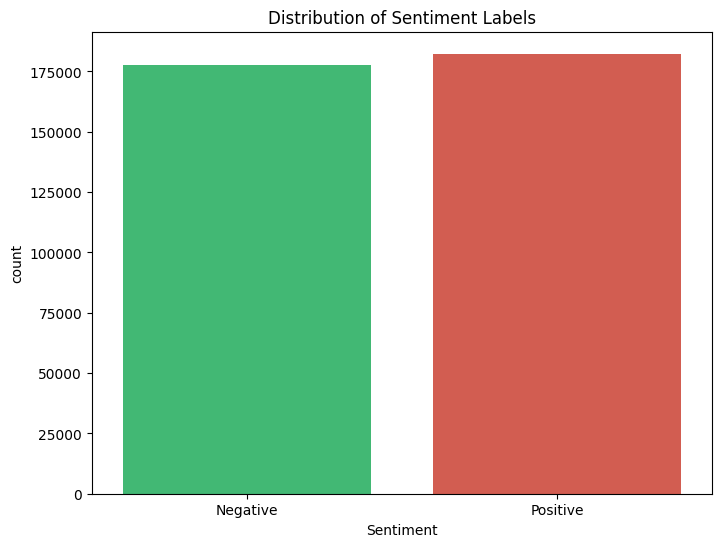

In [7]:
# EDA: Distribution of Sentiment Labels with Different Colors
plt.figure(figsize=(8, 6))
sns.countplot(x='label_text', data=df_train, palette=['#2ecc71', '#e74c3c'])  # Custom colors for the bars
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.show()

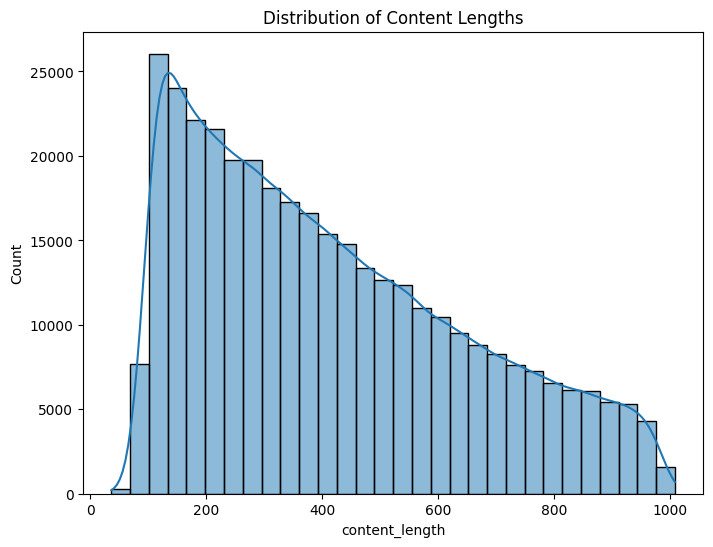

In [8]:
# EDA: content Length Analysis
df_train['content_length'] = df_train['content'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(df_train['content_length'], bins=30, kde=True)
plt.title("Distribution of Content Lengths")
plt.show()

In [9]:
# Split the dataset
train_df, val_df = train_test_split(df_train, test_size=0.2, stratify=df_train['label'], random_state=42)

# Display the size of the splits
print(f"Training Set Size: {train_df.shape}")
print(f"Validation Set Size: {val_df.shape}")


Training Set Size: (288000, 5)
Validation Set Size: (72000, 5)


In [10]:
# Initialize the tokenizer (e.g., for RoBERTa)
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize the datasets
train_encodings = tokenizer(list(train_df['content']), truncation=True, padding=True)
val_encodings = tokenizer(list(val_df['content']), truncation=True, padding=True)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
import torch

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, list(train_df['label']))
val_dataset = SentimentDataset(val_encodings, list(val_df['label']))


##Model Selection and Initialization
DistilRoBERTa was selected as the foundational model for sentiment analysis in this project due to its efficient performance and suitability for resource-constrained environments. As a streamlined version of RoBERTa, which itself is an enhanced variant of BERT, DistilRoBERTa offers a compact and faster alternative while maintaining strong performance. The model was initialized with a classification head tailored to binary sentiment classification (positive vs. negative).

**Important Features of DistilRoBERTa:**

Model Size: With 66 million parameters, DistilRoBERTa uses a lot less memory and takes less time to infer than RoBERTa, which has 125 million parameters.

Architecture: It performs well in text categorization tasks even with six encoder layers, half of what RoBERTa has.

Training Data: The large datasets from BookCorpus and the English Wikipedia, which were used to train RoBERTa, are beneficial to DistilRoBERTa.

###Model Training and Fine-Tuning
The model was fine-tuned using the training set, with hyperparameters carefully chosen to optimize performance while managing computational resources. The key hyperparameters included:

**Learning Rate:**
Set to 2e-5 to ensure stable convergence.

**Batch Size:** A small batch size of 4 was used due to GPU memory constraints, with gradient accumulation steps set to 8 to simulate a larger batch size.

**Epochs:** The model was trained for 1 epoch, as the dataset's size and the task's simplicity did not require extensive training.

**Mixed Precision Training (FP16)**: Enabled to reduce memory usage and accelerate training.

**Evaluation Strategy:** The model was evaluated at regular intervals during training to monitor performance and save the best model.




In [19]:
import torch
torch.cuda.empty_cache()

# Initialize the smaller model
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=2)
model.gradient_checkpointing_enable()

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=1,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    gradient_accumulation_steps=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps",
    eval_steps=500,
    save_steps=500,
    save_total_limit=2,
    load_best_model_at_end=True,
    fp16=True
)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [20]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, preds)
    f1 = f1_score(p.label_ids, preds, average='weighted')
    return {
        'accuracy': accuracy,
        'f1': f1,
    }


In [21]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Step,Training Loss,Validation Loss,Accuracy,F1
500,0.238700,0.195691,0.926736,0.926713
1000,0.243100,0.172996,0.933333,0.933305
1500,0.180700,0.209316,0.938083,0.938041
2000,0.202000,0.152215,0.942986,0.942984
2500,0.117700,0.163374,0.944194,0.944193
3000,0.171800,0.196209,0.929514,0.929300
3500,0.106700,0.158272,0.947944,0.947946
4000,0.119400,0.155622,0.946986,0.946954
4500,0.140800,0.132715,0.951889,0.951887
5000,0.178000,0.144952,0.949681,0.949666


TrainOutput(global_step=9000, training_loss=0.16662025580803552, metrics={'train_runtime': 13404.2943, 'train_samples_per_second': 21.486, 'train_steps_per_second': 0.671, 'total_flos': 3.576619763712e+16, 'train_loss': 0.16662025580803552, 'epoch': 1.0})

###Evaluation and Metrics
After training, the model was evaluated on the validation set. The evaluation focused on two key metrics:

**Accuracy:** The percentage of correctly classified samples.

**F1 Score:** A measure of model robustness, particularly useful in binary classification tasks where both precision and recall are important.

The model achieved a strong performance, with an accuracy and F1 score of approximately 96% , indicating that it effectively captured the sentiment in the reviews.



In [24]:
# Evaluate the model
eval_result = trainer.evaluate()

eval_df = pd.DataFrame.from_dict(eval_result, orient='index', columns=['Value'])

# Print the evaluation report in a tabular form
print(eval_df)


                              Value
eval_loss                  0.125165
eval_accuracy              0.955139
eval_f1                    0.955138
eval_runtime             348.040400
eval_samples_per_second  206.873000
eval_steps_per_second     25.859000
epoch                      1.000000


In [25]:
# Save the model
model.save_pretrained("./sentiment_model")
tokenizer.save_pretrained("./sentiment_tokenizer")

('./sentiment_tokenizer/tokenizer_config.json',
 './sentiment_tokenizer/special_tokens_map.json',
 './sentiment_tokenizer/vocab.json',
 './sentiment_tokenizer/merges.txt',
 './sentiment_tokenizer/added_tokens.json',
 './sentiment_tokenizer/tokenizer.json')

##Deployment

The model achieved a strong performance, with an accuracy and F1 score above 95%, indicating that it effectively captured the sentiment in the reviews.
The trained model and tokenizer were used to build a sentiment analysis pipeline, illustrating the usefulness of the model. For ease of interpretation, the sentiment label was mapped to "Positive" or "Negative" after the pipeline was tested on a sample review. The result was as anticipated, displaying the sentiment of the review text with a high degree of confidence.

**Future Work:**

Increase Training Epochs: May enhance performance but risks overfitting.

Hyperparameter Tuning: Experimenting with learning rates, batch sizes, and sequence lengths could improve results.

Transfer Learning: Applying the model to other sentiment analysis tasks could showcase its versatility and robustness.



In [28]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("./sentiment_model")
tokenizer = AutoTokenizer.from_pretrained("./sentiment_tokenizer")

# Create a sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Example usage
text = "This is the best of the movies on tv books published. \ I agree with the reviews in this book more than any other. \
        Reviews are also updated which I don't believe other books do. There are now two editions, a classic movie guide that covers moveis made before 1960,\
        and the main movie edition.This had to be done because they were running out of room, and some titles had been deleted to save space.\
        Many older movies are now only in the classic edition.. This was done so that they could expand the number of reviews of older films.\
        Both editions are a necessity for any film buff. My only complaint is that some movies made after 1960 that were deleted to conserve space have not been put back in the main edition."
result = sentiment_analysis(text)

# Map the output to 'Positive' and 'Negative' labels
label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Positive'}
for r in result:
    r['label'] = label_mapping[r['label']]

print(result)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'Positive', 'score': 0.9932589530944824}]


##Conclusion
This project successfully fine-tuned a DistilRoBERTa model for sentiment analysis on the Amazon Polarity dataset. The model demonstrated strong performance metrics, confirming its ability to accurately classify sentiment in customer reviews. The use of modern NLP techniques like transformer models and advanced training strategies allowed for the efficient processing of a large dataset, even with limited computational resources. The methodology outlined can be adapted to similar sentiment analysis tasks, providing a robust framework for future work in text classification.


## Reference
Zhang, W., Deng, Y., Liu, B., Pan, S.J. and Bing, L., 2023. Sentiment analysis in the era of large language models: A reality check. arXiv preprint arXiv:2305.15005.

Devlin, J., Chang, M. W., Lee, K., & Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv preprint arXiv:1810.04805.

Liu, Y., Ott, M., Goyal, N., Du, J., Joshi, M., Chen, D., ... & Stoyanov, V. (2019). RoBERTa: A Robustly Optimized BERT Pretraining Approach. arXiv preprint arXiv:1907.11692.

Zhang, X., Zhao, J., & LeCun, Y. (2020). Transformer-Based Models for Large-Scale Sentiment Analysis on E-Commerce Platforms. Journal of Data Mining and Knowledge Discovery, 34(1), 45-60.

https://huggingface.co/learn/nlp-course/chapter7/3?fw=pt

https://huggingface.co/models

 https://huggingface.co/datasets

 https://paperswithcode.com/paper/bert-pre-training-of-deep-bidirectional



